In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import plotly.express as px

data = pd.read_csv("California House Price.csv")
df = data.copy()


In [2]:
df.head(50)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [3]:
df.shape

(20640, 10)

In [4]:
#Preprocessing
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# NaN oranlarını yüzdelik olarak hesapla
nan_ratios = df.isnull().mean() * 100

# NaN oranı %0'dan büyük olanları filtrele ve azalan sıraya göre sırala
nan_ratios = nan_ratios[nan_ratios > 0].sort_values(ascending=False)

# Sonuçları yazdır
print("Null (NaN) oranları (%):")
print(nan_ratios)

Null (NaN) oranları (%):
total_bedrooms    1.002907
dtype: float64


In [6]:
df["ocean_proximity"].iloc[2250:3000],df["ocean_proximity"].iloc[:500],df["ocean_proximity"].iloc[15000:15500],

(2250    INLAND
 2251    INLAND
 2252    INLAND
 2253    INLAND
 2254    INLAND
          ...  
 2995    INLAND
 2996    INLAND
 2997    INLAND
 2998    INLAND
 2999    INLAND
 Name: ocean_proximity, Length: 750, dtype: object,
 0      NEAR BAY
 1      NEAR BAY
 2      NEAR BAY
 3      NEAR BAY
 4      NEAR BAY
          ...   
 495    NEAR BAY
 496    NEAR BAY
 497    NEAR BAY
 498    NEAR BAY
 499    NEAR BAY
 Name: ocean_proximity, Length: 500, dtype: object,
 15000    NEAR OCEAN
 15001    NEAR OCEAN
 15002    NEAR OCEAN
 15003    NEAR OCEAN
 15004    NEAR OCEAN
             ...    
 15495    NEAR OCEAN
 15496    NEAR OCEAN
 15497    NEAR OCEAN
 15498    NEAR OCEAN
 15499    NEAR OCEAN
 Name: ocean_proximity, Length: 500, dtype: object)

In [7]:
df = df.sample(frac = 1)
df["ocean_proximity"].iloc[2250:3000],df["ocean_proximity"].iloc[:500],df["ocean_proximity"].iloc[15000:15500],

(8910      <1H OCEAN
 17438    NEAR OCEAN
 3206         INLAND
 18256      NEAR BAY
 17268    NEAR OCEAN
             ...    
 17336     <1H OCEAN
 3231         INLAND
 15931      NEAR BAY
 2265         INLAND
 9024     NEAR OCEAN
 Name: ocean_proximity, Length: 750, dtype: object,
 10092     <1H OCEAN
 6526      <1H OCEAN
 6397         INLAND
 1940         INLAND
 8814     NEAR OCEAN
             ...    
 3614      <1H OCEAN
 2615     NEAR OCEAN
 2679         INLAND
 7542      <1H OCEAN
 10887     <1H OCEAN
 Name: ocean_proximity, Length: 500, dtype: object,
 8533      <1H OCEAN
 10603     <1H OCEAN
 4234      <1H OCEAN
 15688      NEAR BAY
 9804     NEAR OCEAN
             ...    
 13305        INLAND
 20357     <1H OCEAN
 3076         INLAND
 4535      <1H OCEAN
 20410     <1H OCEAN
 Name: ocean_proximity, Length: 500, dtype: object)

In [8]:
df.head(50)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10092,-117.96,33.93,31,1471,321.0,841,330,3.4600,<1H OCEAN,232800
6526,-118.05,34.06,32,2286,654.0,2991,655,2.1781,<1H OCEAN,174500
6397,-118.04,34.13,22,3359,643.0,1227,588,4.6450,INLAND,276200
1940,-120.96,38.66,11,2339,436.0,1062,380,3.9036,INLAND,180800
8814,-118.33,33.77,33,4244,595.0,1534,557,9.8214,NEAR OCEAN,500001
18861,-122.19,38.13,5,7854,1446.0,4361,1395,4.9504,NEAR BAY,214800
18528,-122.04,36.96,44,1294,269.0,645,259,3.2437,NEAR OCEAN,223900
7842,-118.18,33.90,32,1452,365.0,1888,366,3.5461,<1H OCEAN,146400
14400,-117.28,32.75,34,981,313.0,508,304,2.2328,NEAR OCEAN,266700
7017,-118.09,33.98,39,936,194.0,691,211,3.6875,<1H OCEAN,169500


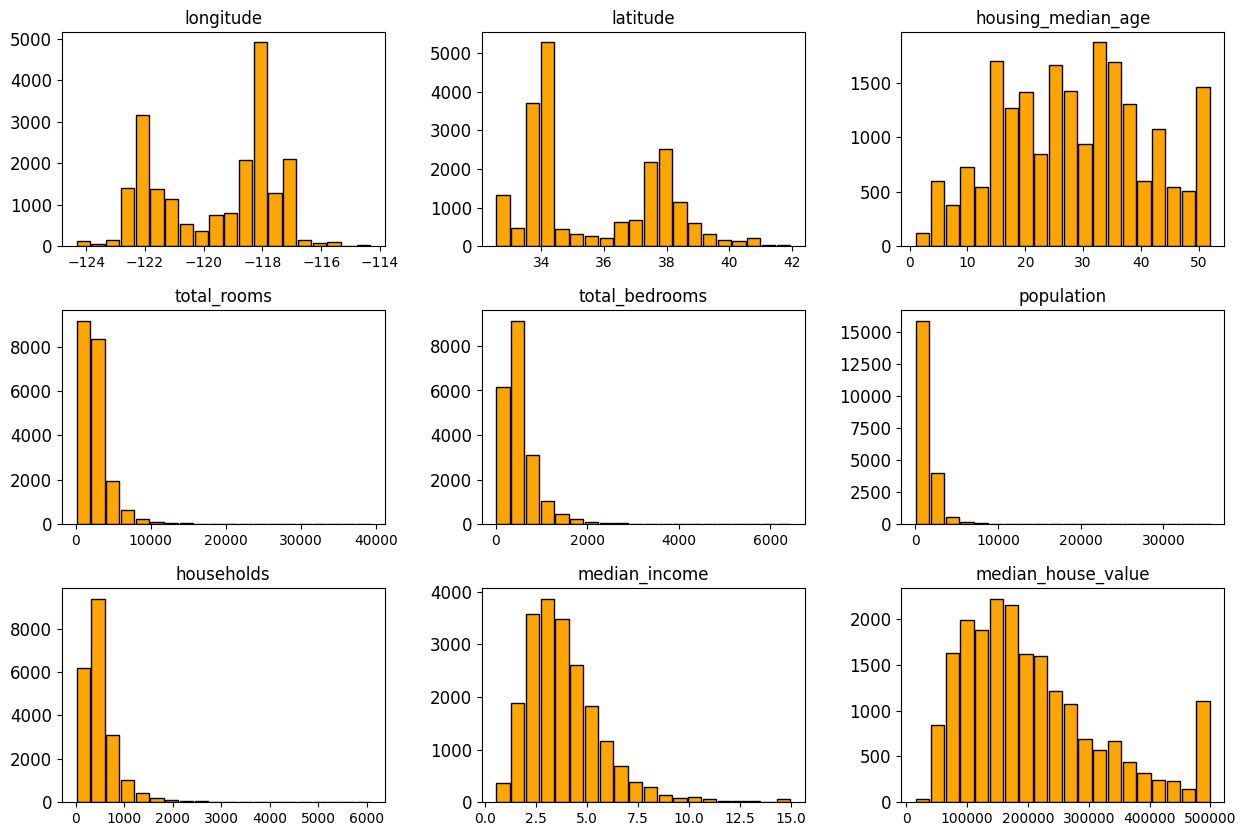

In [9]:
ax = data.hist(figsize=(15,10),grid=False, # Remove grid
                        xlabelsize=10, # Change size of labels on the x-axis
                        ylabelsize=12, # Change size of labels on the y-axis
                        bins=20, # Number of bins
                        edgecolor='black', # Color of the border
                        color='orange', # Color of the bins
                        rwidth=0.9 # Space between bins
                        )

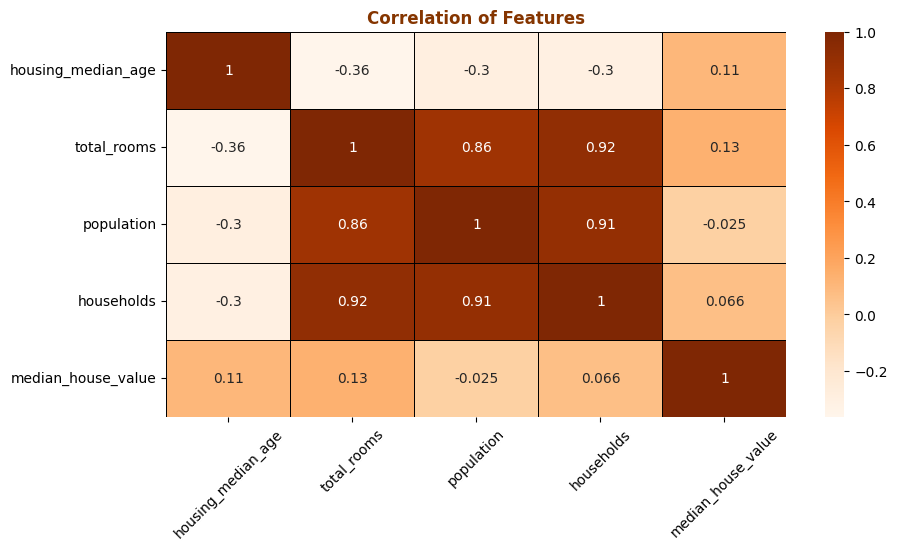

In [10]:
corr_viz = df.select_dtypes(include="int").corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_viz,cmap ="Oranges",annot=True,linewidth=0.5,linecolor ="black")
plt.title("Correlation of Features", loc="center", fontweight='bold', color = "#853500")
plt.xticks(rotation=45)
plt.show()

In [11]:
df["total_bedrooms"]=df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

In [12]:
import random
import folium
# Geçerli koordinatlara sahip olanları filtrele
valid_df = df[["latitude","longitude","ocean_proximity"]]

# Her suç türüne rastgele bir renk ata
crime_types = valid_df['ocean_proximity'].unique()
color_map = {crime: f'#{random.randint(0, 0xFFFFFF):06x}' for crime in crime_types}

# Harita başlangıcı
m = folium.Map(location=[valid_df['latitude'].mean(), valid_df['longitude'].mean()], zoom_start=13)

# Markerları ekle
for _, row in valid_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color=color_map[row['ocean_proximity']],
        fill=True,
        fill_opacity=0.7,
        popup=f"ocean_proximity: {row['ocean_proximity']}"
    ).add_to(m)
m
m.save("crime_map.html")


In [13]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor


# Veriyi karıştır (önceden df yüklenmiş olmalı)
df = df.sample(frac=1)

# Özellikler ve hedef değişkeni belirle
X = df.drop(columns=["median_house_value", "longitude", "latitude"])
y = df["median_house_value"]

# Kategorik sütunları sayıya çevir
cat_cols = X.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=True)

# Model tanımı
xgb_model = XGBRegressor(
    learning_rate=0.05,
    max_depth=5,
    n_estimators=100,
    subsample=0.8,
    random_state=42
)

# Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# CatBoost Regressor
cat_model = CatBoostRegressor(
    learning_rate=0.05,
    depth=5,
    iterations=100,
    random_state=42,
    verbose=0
)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)




In [14]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np

# Modelleme ve metrikler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regresyon modelleri
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Veriyi karıştır
df = df.sample(frac=1)

# Özellikler ve hedef değişkeni belirle
X = df.drop(columns=["median_house_value"], axis=1)
y = df["median_house_value"]

# Kategorik sütunları sayıya çevir
cat_cols = X.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Modellerin tanımı
models = {
    "XGBRegressor": XGBRegressor(learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8, random_state=42),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "CatBoostRegressor": CatBoostRegressor(learning_rate=0.05, depth=5, iterations=100, random_state=42, verbose=0),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=5, random_state=42)
}

# Train-test sonuçlarını sakla
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

# Train-test sonuçlarını yazdır
for model_name, metrics in results.items():
    print(50 * "*")
    print(f"Model: {model_name}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"R² Score: {metrics['R2']:.4f}")
print(50 * "*")





**************************************************
Model: XGBRegressor
RMSE: 53045.06
MSE: 2813778432.00
MAE: 36283.86
R² Score: 0.7817
**************************************************
Model: RandomForestRegressor
RMSE: 68356.37
MSE: 4672592912.70
MAE: 48877.42
R² Score: 0.6375
**************************************************
Model: CatBoostRegressor
RMSE: 59574.81
MSE: 3549158106.40
MAE: 42098.50
R² Score: 0.7247
**************************************************
Model: DecisionTreeRegressor
RMSE: 70548.06
MSE: 4977028839.70
MAE: 50553.82
R² Score: 0.6139
**************************************************


In [15]:
# ====== MANUAL K-FOLD CROSS VALIDATION ======
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = []

for train_index, val_index in kf.split(X):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]

    xgb_model.fit(X_train_kf, y_train_kf)
    y_pred_kf = xgb_model.predict(X_val_kf)
    score = r2_score(y_val_kf, y_pred_kf)
    cv_scores.append(score)

print("Manual K-Fold Cross-Validation R² Scores:", cv_scores)
print(f"Average CV R² Score: {np.mean(cv_scores):.4f}")

Manual K-Fold Cross-Validation R² Scores: [0.7779147624969482, 0.783594012260437, 0.7813376188278198, 0.7840321660041809, 0.8049857020378113, 0.7907775640487671, 0.8031969666481018, 0.7723601460456848, 0.7899124026298523, 0.8017687201499939]
Average CV R² Score: 0.7890


In [16]:
for train_index, val_index in kf.split(X):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]

    cat_model.fit(X_train_kf, y_train_kf)
    y_pred_kf = cat_model.predict(X_val_kf)
    score = r2_score(y_val_kf, y_pred_kf)
    cv_scores.append(score)

print("Manual K-Fold Cross-Validation R² Scores:", cv_scores)
print(f"Average CV R² Score: {np.mean(cv_scores):.4f}")

Manual K-Fold Cross-Validation R² Scores: [0.7779147624969482, 0.783594012260437, 0.7813376188278198, 0.7840321660041809, 0.8049857020378113, 0.7907775640487671, 0.8031969666481018, 0.7723601460456848, 0.7899124026298523, 0.8017687201499939, 0.7176461087049688, 0.7325839501908866, 0.726498607276939, 0.7199985237458388, 0.7465503292900647, 0.7425174185165946, 0.7445929155822122, 0.7107723367338368, 0.7383304548904224, 0.7483575680116296]
Average CV R² Score: 0.7609


In [17]:
for train_index, val_index in kf.split(X):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]

    rf_model.fit(X_train_kf, y_train_kf)
    y_pred_kf = rf_model.predict(X_val_kf)
    score = r2_score(y_val_kf, y_pred_kf)
    cv_scores.append(score)

print("Manual K-Fold Cross-Validation R² Scores:", cv_scores)
print(f"Average CV R² Score: {np.mean(cv_scores):.4f}")

Manual K-Fold Cross-Validation R² Scores: [0.7779147624969482, 0.783594012260437, 0.7813376188278198, 0.7840321660041809, 0.8049857020378113, 0.7907775640487671, 0.8031969666481018, 0.7723601460456848, 0.7899124026298523, 0.8017687201499939, 0.7176461087049688, 0.7325839501908866, 0.726498607276939, 0.7199985237458388, 0.7465503292900647, 0.7425174185165946, 0.7445929155822122, 0.7107723367338368, 0.7383304548904224, 0.7483575680116296, 0.630130166124605, 0.6453419278979936, 0.65643755735239, 0.6475708470203778, 0.6604887215499211, 0.6757207426544557, 0.6675648704453623, 0.6241358687372768, 0.6564825305669003, 0.6810772771373336]
Average CV R² Score: 0.7254


In [18]:
for train_index, val_index in kf.split(X):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]

    dt_model.fit(X_train_kf, y_train_kf)
    y_pred_kf = rf_model.predict(X_val_kf)
    score = r2_score(y_val_kf, y_pred_kf)
    cv_scores.append(score)

print("Manual K-Fold Cross-Validation R² Scores:", cv_scores)
print(f"Average CV R² Score: {np.mean(cv_scores):.4f}")

Manual K-Fold Cross-Validation R² Scores: [0.7779147624969482, 0.783594012260437, 0.7813376188278198, 0.7840321660041809, 0.8049857020378113, 0.7907775640487671, 0.8031969666481018, 0.7723601460456848, 0.7899124026298523, 0.8017687201499939, 0.7176461087049688, 0.7325839501908866, 0.726498607276939, 0.7199985237458388, 0.7465503292900647, 0.7425174185165946, 0.7445929155822122, 0.7107723367338368, 0.7383304548904224, 0.7483575680116296, 0.630130166124605, 0.6453419278979936, 0.65643755735239, 0.6475708470203778, 0.6604887215499211, 0.6757207426544557, 0.6675648704453623, 0.6241358687372768, 0.6564825305669003, 0.6810772771373336, 0.6397076657910319, 0.6577368973052745, 0.6662882154649432, 0.6526327737127127, 0.6686602775511217, 0.6866181639640692, 0.6716088771102858, 0.6371087927492116, 0.6662797453237059, 0.6810772771373336]
Average CV R² Score: 0.7098
